# Predictive Maintenance - Remaining useful life of mining machines

## A briethly overview about the project and the published paper

This paper focuses on the application of machine learning in the analysis of engine oil degradation data with the goal of predicting the optimal time for oil replacement. The study aims to assess the feasibility of extending oil change intervals by considering the actual properties of lubricants and their degradation limits, rather than relying solely on manufacturer-recommended operating hours. This approach could lead to reduced maintenance costs, improved asset productivity, and reduced environmental impact due to fewer oil changes.

The study emphasizes the use of data analysis and data science techniques to achieve these goals. The authors collected and analyzed oil samples from two mining equipment engines, TE8037 and TE8038. They monitored various oil properties such as viscosity, total base number (TBN), oxidation, soot content, sulfation, and nitration over time to assess oil degradation. By studying these parameters, they aimed to predict the optimal time for oil replacement and determine if the engines could operate effectively beyond the manufacturer-recommended intervals.

Machine learning, particularly Support Vector Regression (SVR), was employed to model the degradation patterns of these parameters. The authors compared the performance of linear and polynomial models in predicting the parameter values over time. They used the Mean Absolute Error (MAE) as a metric to evaluate the accuracy of their models.

Key findings and conclusions of the study include:

- Benefits of Extended Oil Change Intervals: The study demonstrates the potential to extend oil change intervals by up to 50% without compromising engine performance. This extension could lead to increased availability, reduced maintenance costs, and decreased environmental impact.

- Importance of Parameter Monitoring: Monitoring oil parameters such as viscosity, TBN, oxidation, and others provides insights into the health of the engine and the state of the lubricant. These parameters can be used to predict the optimal time for oil replacement.

- Machine Learning for Predictive Analysis: Machine learning models, particularly SVR, can accurately predict the degradation patterns of various oil parameters. Linear models generally showed better adherence to the data compared to polynomial models.

- Application of Data Science: The study demonstrates how data analysis and data science techniques can support decision-making in the context of oil management, replacement, and degradation monitoring. These techniques provide insights that aid in optimizing fleet performance and minimizing environmental impact.

In summary, the paper emphasizes the use of machine learning and data analysis to predict the optimal time for engine oil replacement. By monitoring various oil parameters and employing SVR models, the authors demonstrate the feasibility of extending oil change intervals while maintaining engine performance and minimizing environmental consequences.


## Code details

This project estimates the **remaining useful life of mining machines** by training and evaluating **machine learning models** on various **oil compound properties**. Here's a breakdown of the code and its functionality:

- Importing Libraries:
  - The code begins by importing necessary libraries such as **numpy**, **pandas**, **matplotlib.pyplot**, and **seaborn**.

- Reading Motor's Dataset:
  - Loads the dataset containing information about **mining machines' oil properties** (e.g., TBN, OXI, V100, etc.).
  - Displays the first few rows of the dataset to get an overview of the data.

- Defining Thresholds:
  - Sets the **acceptable threshold ranges** for each oil compound property. These thresholds are used to determine whether a machine is operating normally or needs maintenance.

- Plotting Data Points for Each Element of Each Motor:
  - Plots scatter plots for each oil compound property against the "Horas Oleo" (oil hours) column for each motor. This visualization provides **insights** into the relationship between oil properties and operating hours.

- Defining Parameters and Functions for Model Training:
  - Defines a function (generate_models_2) to generate and evaluate **machine learning models** for each oil compound property and different machine learning algorithms (e.g., linear regression, support vector machines).

- Automating Model Training and Evaluation:
  - Automates the process of training and evaluating models for each oil compound property and different machine learning algorithms.
  - Stores the results (MAE, estimated maintenance hour) in dataframes for analysis and comparison.

- Printing Results:
  - Prints the **cross-validation mean absolute error (MAE)**, **validation MAE**, and **estimated maintenance hour for each oil compound property and machine learning algorithm combination**.

This code serves as an example of **how to estimate the remaining useful life** of mining machines using machine learning techniques and provides insights into the **performance of different algorithms on predicting failure points**.





It was written with a partnership of Cid Clay and Felipe Duarte, for the purpouse of contributing to a paper entitled "MACHINE LEARNING NA PREVISÃO DE HORAS DE SUBSTITUIÇÃO DE ÓLEO DO MOTOR_ FOCO EM IMPACTO AMBIENTAL". The papar was published in the Abraman Conference

Notebook Author: Felipe Vital Cacique

In [1]:
# Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings. filterwarnings('ignore')

##### Reading motor's dataset

In [2]:
# Reading motors's dataset
motors_data = pd.read_csv("./data/motor_projecao_all sample.csv")

In [3]:
# Visualizing data
motors_data.head()

,Motor,Carga,Horas Oleo,TBN,OXI,V100,ST,NIT,SUL,CU,FE
0,TE8037,6,61,8.6,11,13.0,2,6,20,46,8
1,TE8037,6,96,8.6,11,13.0,3,7,20,48,9
2,TE8037,6,201,9.7,12,12.0,6,8,22,55,6
3,TE8037,6,239,9.2,12,12.0,6,7,21,59,8
4,TE8037,6,345,9.5,11,13.0,2,6,18,0,2


In [4]:
# Printing some information about the data
print("The unique motors are: ", motors_data.Motor.unique())
print("The dataset columns are: ", motors_data.columns.values)

The unique motors are:  ['TE8037' 'TE8038']
The dataset columns are:  ['Motor' 'Carga' 'Horas Oleo' 'TBN' 'OXI' 'V100' 'ST' 'NIT' 'SUL' 'CU'
 'FE']


* The dataset has 2 motors: 'TE8037' and 'TE8038', and and for each motor thre will be its working load ('carga'), the amount of hours since the last oil replacement, and the concenration of the most relevant elements of the oil: 'TBN' 'OXI' 'V100' 'ST' 'NIT' 'SUL' 'CU'.

##### Defining thresholds for each element 
There is an acceptable concentration of each oil elements. For some of them, the specialists already know the acceptable ammount. The max and min ammounts will be our threshold, which we will specify bellow.

In [5]:
# Defining the thresholds for each element
thresholds = {
    'TBN':  {'max':None, 'min':7.00},   
    'OXI':  {'max':24.00, 'min':None},  
    'V100': {'max':15.00, 'min':9.00}, 
    'ST':   {'max':60.00, 'min':None}, 
    'NIT':  {'max':None, 'min':None}, 
    'SUL':  {'max':28.00, 'min':None},  
    'CU':   {'max':10.00, 'min':None}, 
    'FE':   {'max':36.00, 'min':None} 
}

##### Ploting the data points for each element of each motor

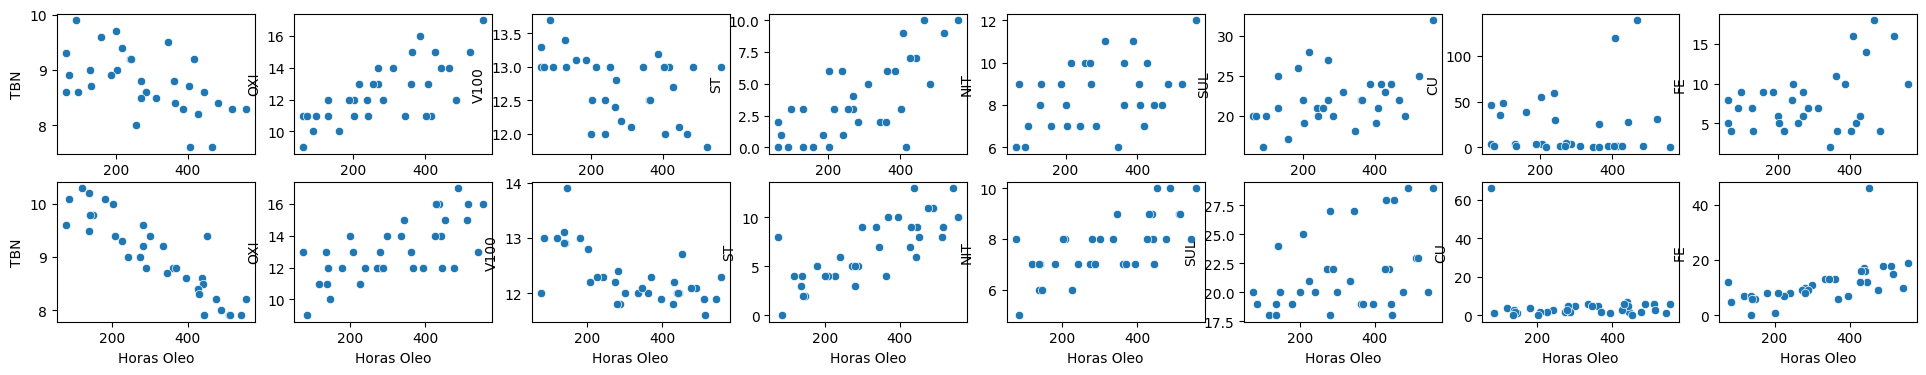

In [6]:
# Ploting the data points for each element of each motor, in one single graph
fig, ax = plt.subplots(nrows=2,ncols=8,figsize=(24,4))
for i,motor in enumerate(['TE8037','TE8038']):
    for j,column in enumerate(['TBN', 'OXI', 'V100', 'ST', 'NIT', 'SUL', 'CU', 'FE']):
        sns.scatterplot(x=motors_data.loc[motors_data.Motor == motor]["Horas Oleo"], y=motors_data.loc[motors_data.Motor == motor][column], ax=ax[i,j])

##### Create a shifted columns that might be used in our experiments
We will create a shifted column, so that we can use the more easily the sample[-1] to predict the next point

In [7]:
# Create a shifted columns that might be used in our experiments
for column in ['Horas Oleo', 'TBN', 'OXI', 'V100', 'ST', 'NIT', 'SUL', 'CU', 'FE']:
    motors_data[column+' shifted'] = motors_data.groupby(motors_data.Motor)[column].shift(1)
    motors_data[column+' shifted'] = motors_data[column+' shifted'].fillna(motors_data[column])
motors_data.head()

,Motor,Carga,Horas Oleo,TBN,OXI,V100,ST,NIT,SUL,CU,FE,Horas Oleo shifted,TBN shifted,OXI shifted,V100 shifted,ST shifted,NIT shifted,SUL shifted,CU shifted,FE shifted
0,TE8037,6,61,8.6,11,13.0,2,6,20,46,8,61.0,8.6,11.0,13.0,2.0,6.0,20.0,46.0,8.0
1,TE8037,6,96,8.6,11,13.0,3,7,20,48,9,61.0,8.6,11.0,13.0,2.0,6.0,20.0,46.0,8.0
2,TE8037,6,201,9.7,12,12.0,6,8,22,55,6,96.0,8.6,11.0,13.0,3.0,7.0,20.0,48.0,9.0
3,TE8037,6,239,9.2,12,12.0,6,7,21,59,8,201.0,9.7,12.0,12.0,6.0,8.0,22.0,55.0,6.0
4,TE8037,6,345,9.5,11,13.0,2,6,18,0,2,239.0,9.2,12.0,12.0,6.0,7.0,21.0,59.0,8.0


In [8]:
# Printing all the columns
print(motors_data.columns)

Index(['Motor', 'Carga', 'Horas Oleo', 'TBN', 'OXI', 'V100', 'ST', 'NIT',
       'SUL', 'CU', 'FE', 'Horas Oleo shifted', 'TBN shifted', 'OXI shifted',
       'V100 shifted', 'ST shifted', 'NIT shifted', 'SUL shifted',
       'CU shifted', 'FE shifted'],
      dtype='object')


##### Defining training size, motor, oil element and features we will use 

In [9]:
train_size = 20
motor_name = 'TE8038'
#carga = 6
y_column = ['TBN', 'OXI', 'V100', 'ST', 'NIT', 'SUL', 'CU', 'FE'][2]
X_column = ['Horas Oleo'] 
# X_column = ['Horas Oleo','Horas Oleo shifted', y_column+' shifted'] # use the shifted columns as features

##### Getting the pair X and y used to feed our ML model

In [10]:
#X = motors_data.loc[(motors_data.Motor == motor_name) & (motors_data.Carga == carga)][X_column]
#y = motors_data.loc[(motors_data.Motor == motor_name) & (motors_data.Carga == carga)][y_column]
X = motors_data.loc[(motors_data.Motor == motor_name)][X_column]
y = motors_data.loc[(motors_data.Motor == motor_name)][y_column]

##### Splitting data into training and validation sets

In [11]:
X_train, y_train, X_valid, y_valid = X.iloc[:train_size], y.iloc[:train_size], X.iloc[train_size:], y.iloc[train_size:]

##### Define our ML model and apply a cross validation in order to know the performance of the model beforehand

In [12]:
# Importing the ml models
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

my_model = SVR(kernel='linear')
# my_model = LinearRegression()

# Performing a cross validation in order to select the model we will work with
cv = len(X['Horas Oleo'])
scores = -1 * cross_val_score(my_model,X,y,cv=cv,scoring='neg_mean_absolute_error')
print("MAE from cross valid: ", scores.mean())

MAE from cross valid:  0.33284814331840895


##### Train the model 

In [13]:
my_model.fit(X_train,y_train)

SVR(kernel='linear')

##### Use the trained model to predict the validation data and evaluate the model using the MAE

In [14]:
pred_valid = my_model.predict(X_valid)
#mae = mean_absolute_error(y_valid,pred_valid)
#print("MAE from validation: ", mae)

##### Plot the trainning and validation dataset, and the model's curve fit

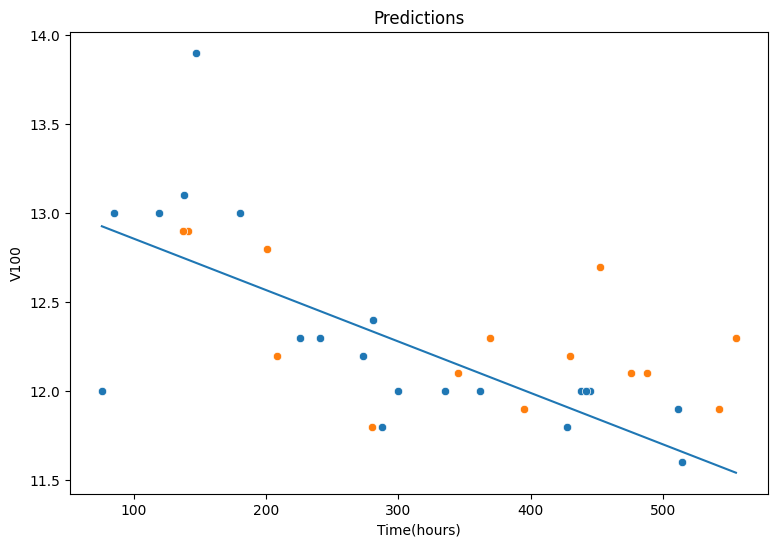

In [15]:
pred_all = my_model.predict(X)

figure = plt.figure(figsize=(9,6))
sns.scatterplot(x=X_train['Horas Oleo'], y=y_train, legend='full')
sns.scatterplot(x=X_valid['Horas Oleo'], y=y_valid, legend='full')
sns.lineplot(x=X['Horas Oleo'], y=pred_all)
plt.title("Predictions")
plt.xlabel('Time(hours)')
plt.savefig('./graphs/curve_fit.png')

### Curve fit projection

##### Plot the projection graph

Text(0.5, 1.0, 'TE8038_projection_V100')

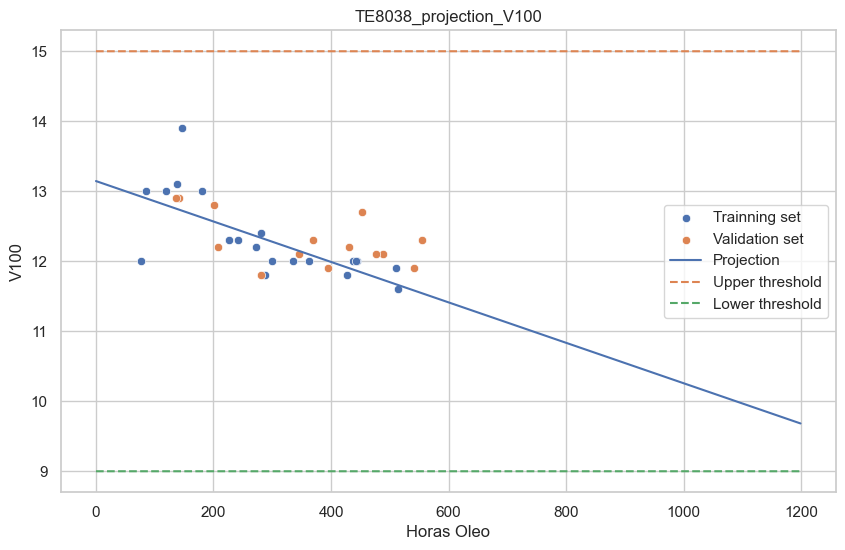

In [17]:
# Specifying the parameters 
horas_oleo_max = 1200

step = 1
horas_oleo = 0
y_proj_before = None
X_proj_before = None
y_proj = None
X_proj = None
element = y_column

X_projs = []
y_projs = []

X_proj_touch = None
y_proj_touch = None

while horas_oleo < horas_oleo_max:

    X_proj_before = X_proj
    y_proj_before = y_proj
    X_proj = [[horas_oleo]]
    y_proj = my_model.predict(X_proj)
    X_projs.append(X_proj[0][0])
    y_projs.append(y_proj[0])
    
    if not(isinstance(y_proj_before,type(None))) and not(isinstance(y_proj,type(None))):
        if not(isinstance(thresholds[element]['max'],type(None))):
             if y_proj_before < thresholds[element]['max'] and y_proj >= thresholds[element]['max']:
                    X_proj_touch = [horas_oleo]
                    y_proj_touch = y_proj
                    break

        if not(isinstance(thresholds[element]['min'],type(None))):
             if y_proj_before > thresholds[element]['min'] and y_proj <= thresholds[element]['min']:
                    X_proj_touch = [horas_oleo]
                    y_proj_touch = y_proj
                    break
                
    horas_oleo += step

# plot projection graph 
sns.set_theme(style="whitegrid")
X_projs = pd.DataFrame({'Horas Oleo':X_projs})    
    
figure = plt.figure(figsize=(10,6))
sns.scatterplot(x=X_train['Horas Oleo'], y=y_train, legend='full', label='Trainning set')
sns.scatterplot(x=X_valid['Horas Oleo'], y=y_valid, legend='full', label='Validation set')
sns.lineplot(x=X_projs['Horas Oleo'], y=y_projs, label='Projection')

if not(isinstance(thresholds[element]['max'],type(None))):
    sns.lineplot(x=X_projs['Horas Oleo'], y=[thresholds[element]['max'] for i in range(0,len(X_projs['Horas Oleo']))], linestyle='dashed', label='Upper threshold')
if not(isinstance(thresholds[element]['min'],type(None))):
    sns.lineplot(x=X_projs['Horas Oleo'], y=[thresholds[element]['min'] for i in range(0,len(X_projs['Horas Oleo']))], linestyle='dashed', label='Lower threshold')

if not(isinstance(thresholds[element]['max'],type(None))) or not(isinstance(thresholds[element]['min'],type(None))):   # it touched one of the threshold, so lets print the point

    if not(isinstance(X_proj_touch,type(None))) or not(isinstance(y_proj_touch,type(None))):
        sns.scatterplot(x=X_proj_touch, y=y_proj_touch, marker='*',s=150, color='red')
        # add text annotation
        plt.text(X_proj_touch[0]+20, y_proj_touch[0] , str(X_proj_touch[0])+' hours', horizontalalignment='left', size='medium', color='red')

        print('Prediction touch threshold:',X_projs['Horas Oleo'].iloc[-1],' hours')

plt.title(motor_name+'_projection_'+y_column)

## In this section we will automate the approach above to train models for each oil element at once 

##### Train models for each oil element and different ML models in order to compare their performance 

#### In this section we will automate the approach above to train models for each oil element at once and for different ML models in order to compare their performance

##### Function that:
* receives a motor data 
* splits into train and valid dataset
* trains the model 
* evaluates the model
* generates the model curve fit
* projects the fitted curve
* estimates the hour that the predicted curve touches the thresholds 
* saves it to a plotting ax to be plotted afterwards

In [18]:
def generate_models_2(motor_name,carga,X_column,y_column,train_size,model_name,horas_oleo_max):

    # Getting the pair X and y used to feed our ML model
    #X = motors_data.loc[(motors_data.Motor == motor_name) & (motors_data.Carga == carga)][X_column]
    #y = motors_data.loc[(motors_data.Motor == motor_name) & (motors_data.Carga == carga)][y_column]
    X = motors_data.loc[(motors_data.Motor == motor_name)][X_column]
    y = motors_data.loc[(motors_data.Motor == motor_name)][y_column]

    
    # Splitting data into training and validation sets
    X_train, y_train, X_valid, y_valid = X.iloc[:train_size], y.iloc[:train_size], X.iloc[train_size:], y.iloc[train_size:]

    
    # Define our ML model and apply a cross validation in order to know the performance of the model beforehand
    
    # Selects the specified model
    if model_name == 'svm_linear': my_model = SVR(kernel='linear')
    if model_name == 'svm_poly': my_model = SVR(kernel='poly')
    if model_name == 'linear_reg': my_model = LinearRegression()   
    
    cv = len(X['Horas Oleo'])
    scores = -1 * cross_val_score(my_model,X,y,cv=cv,scoring='neg_mean_absolute_error')
    print("MAE from cross valid: ", scores.mean())

    
    # Train the model
    my_model.fit(X_train,y_train)

    
    # Use the trainned model to predict the validation data and evaluate the model using the MAE
    if len(X_valid) > 0:
        pred_valid = my_model.predict(X_valid)
        mae = mean_absolute_error(y_valid,pred_valid)
        print("MAE from valid: ", mae)
    else:
        pred_valid = []
        mae = None
        print("MAE from valid: ", mae)


    # generates the model curve fit
    # projects the fitted curve
    # estimates the hour that the predicted curve touches the thresholds
    
    # horas_oleo_max = 1200
    step = 1
    horas_oleo = 0
    y_proj_before = None
    X_proj_before = None
    y_proj = None
    X_proj = None
    element = y_column
    X_projs = []
    y_projs = []
    X_proj_touch = None
    y_proj_touch = None

    while horas_oleo < horas_oleo_max:

        X_proj_before = X_proj
        y_proj_before = y_proj
        
        X_proj = [[horas_oleo]]
        y_proj = my_model.predict(X_proj)
        X_projs.append(X_proj[0][0])
        y_projs.append(y_proj[0])

        if not(isinstance(y_proj_before,type(None))) and not(isinstance(y_proj,type(None))):
            if not(isinstance(thresholds[element]['max'],type(None))):
                 if y_proj_before < thresholds[element]['max'] and y_proj >= thresholds[element]['max']:
                        X_proj_touch = [horas_oleo]
                        y_proj_touch = y_proj
                        break

            if not(isinstance(thresholds[element]['min'],type(None))):
                 if y_proj_before > thresholds[element]['min'] and y_proj <= thresholds[element]['min']:
                        X_proj_touch = [horas_oleo]
                        y_proj_touch = y_proj
                        break

        horas_oleo += step


    # Plot the trainning and validation dataset, and the model's curve fit
    
    # Plot projection graph 
    sns.set_theme(style="whitegrid")
    X_projs = pd.DataFrame({'Horas Oleo':X_projs})    

    # plot dataset points
    figure = plt.figure(figsize=(9,6))
    sns.scatterplot(x=X_train['Horas Oleo'], y=y_train, legend='full', label='Training set')
    sns.scatterplot(x=X_valid['Horas Oleo'], y=y_valid, legend='full', label='Validation set')
    sns.lineplot(x=X_projs['Horas Oleo'], y=y_projs, label='Projection')

    # plot the upper/lower thresholds
    if not(isinstance(thresholds[element]['max'],type(None))):
        sns.lineplot(x=X_projs['Horas Oleo'], y=[thresholds[element]['max'] for i in range(0,len(X_projs['Horas Oleo']))], linestyle='dashed', label='Upper threshold')
    if not(isinstance(thresholds[element]['min'],type(None))):
        sns.lineplot(x=X_projs['Horas Oleo'], y=[thresholds[element]['min'] for i in range(0,len(X_projs['Horas Oleo']))], linestyle='dashed', label='Lower threshold')

    # plot the failure point
    if not(isinstance(thresholds[element]['max'],type(None))) or not(isinstance(thresholds[element]['min'],type(None))):   # it touched one of the threshold, so lets print the point
        if not(isinstance(X_proj_touch,type(None))) or not(isinstance(y_proj_touch,type(None))):
            sns.scatterplot(x=X_proj_touch, y=y_proj_touch, color='red',label='Estimated hour')
            plt.text(X_proj_touch[0]+20, y_proj_touch[0] , str(X_proj_touch[0])+' hours', horizontalalignment='left', size='medium', color='red', fontweight="bold")
            print('The estimated hour is:',X_proj_touch[0],' hours')

    # specify the name that the file will be saved
    name = 'motor_{}__carga_{}__element_{}__model_{}__train_size_{}__valid_size_{}'.format(motor_name,carga,y_column,model_name,train_size,len(X_valid['Horas Oleo']))
   
    plt.title(name, fontweight='bold')
    plt.xlabel('Time(hours)')
    # plt.savefig('./graphs/'+name+'.png')
    plt.show()
    
    return scores.mean(), mae, (X_proj_touch[0] if not(isinstance(X_proj_touch,type(None))) else None)

MAE from cross valid:  0.24780130747501736
MAE from valid:  0.2575258075066345
The estimated hour is: 729  hours


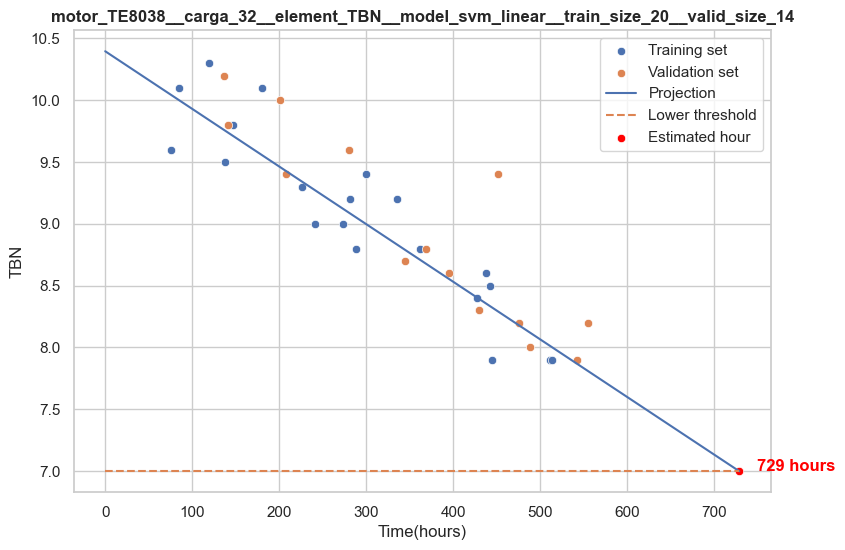

MAE from cross valid:  1.254212608096805
MAE from valid:  1.6785714285797693
The estimated hour is: 1331  hours


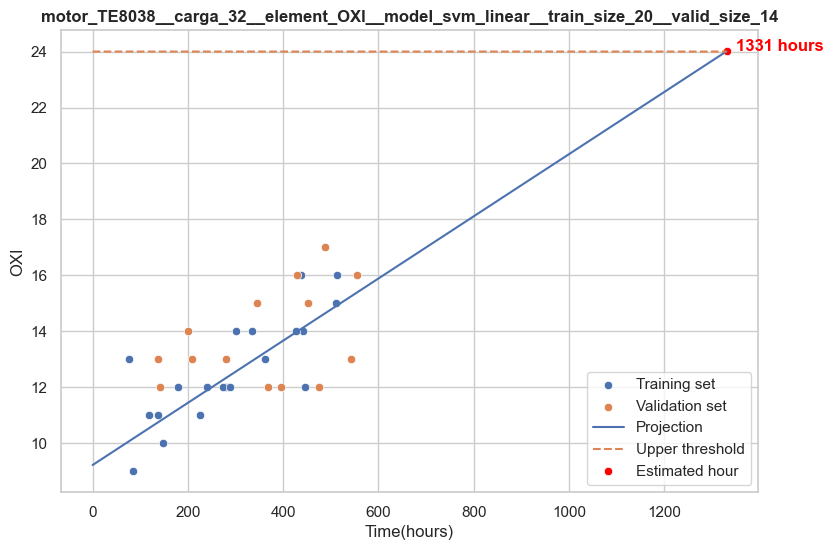

MAE from cross valid:  0.33284814331840895
MAE from valid:  0.3378029912165159
The estimated hour is: 1436  hours


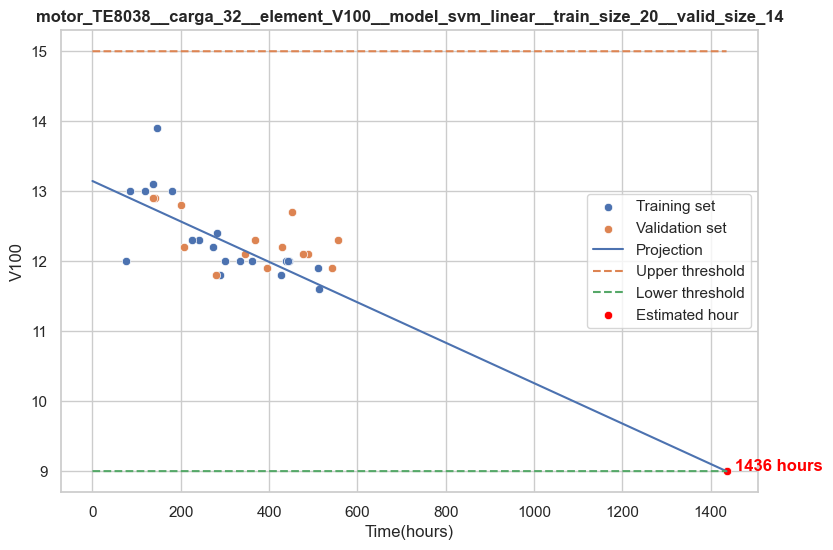

MAE from cross valid:  1.831834566388153
MAE from valid:  1.9198774415969686


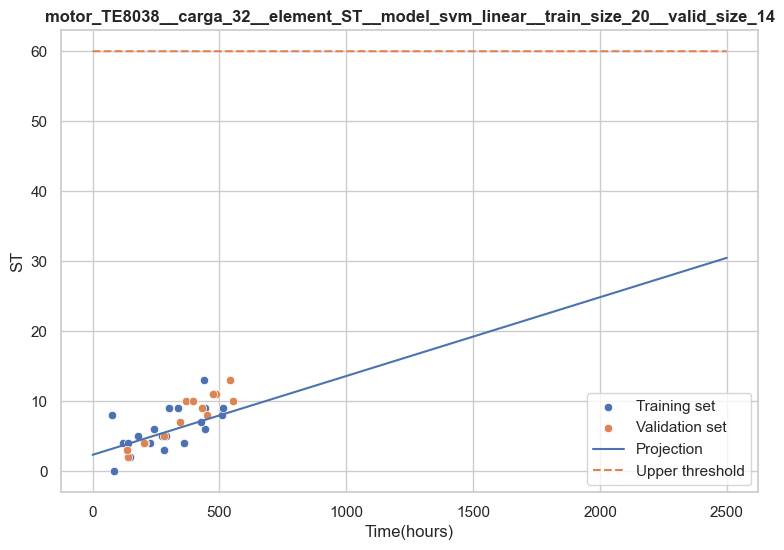

MAE from cross valid:  0.8655883058024361
MAE from valid:  1.0734527053304908


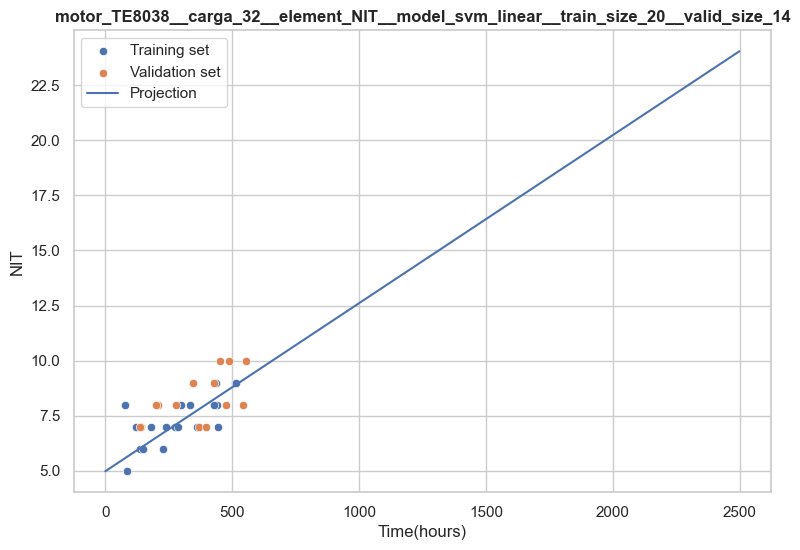

MAE from cross valid:  2.4315446237630427
MAE from valid:  4.107142857160844
The estimated hour is: 1058  hours


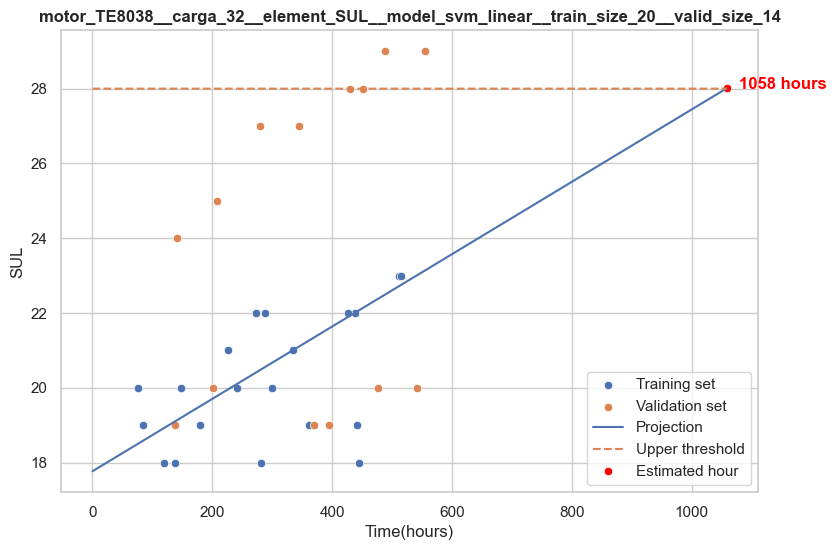

MAE from cross valid:  3.9926660352357337
MAE from valid:  2.277584586470327
The estimated hour is: 1304  hours


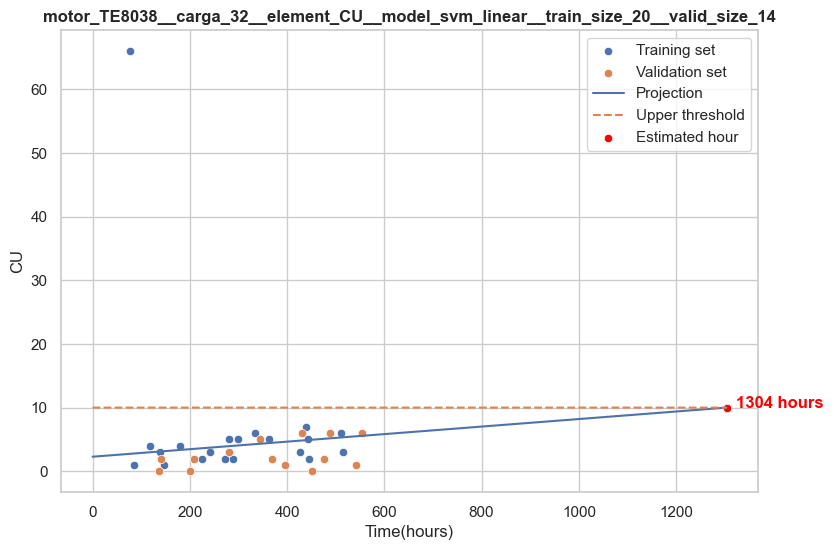

MAE from cross valid:  3.7090684584230904
MAE from valid:  5.926173826198798
The estimated hour is: 1439  hours


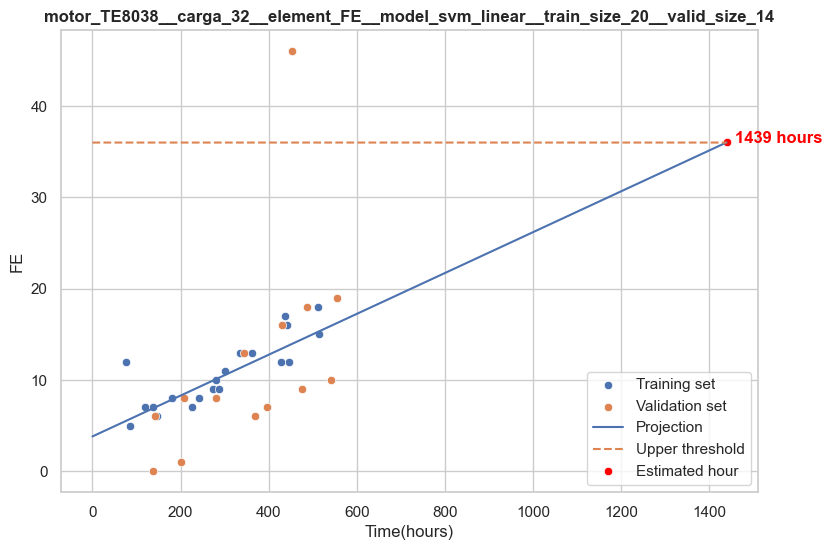

MAE from cross valid:  0.31231298516794054
MAE from valid:  0.364537922042184
The estimated hour is: 578  hours


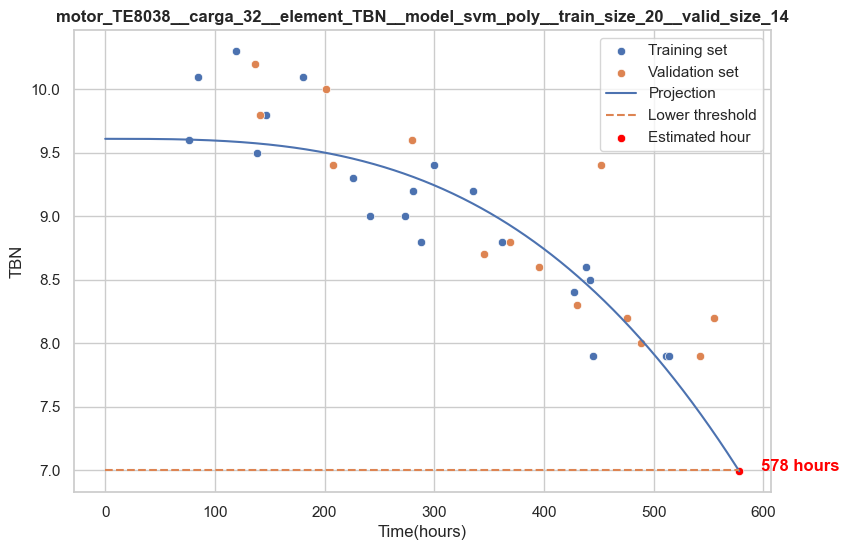

MAE from cross valid:  1.1796439425675709
MAE from valid:  1.7311064593990781
The estimated hour is: 719  hours


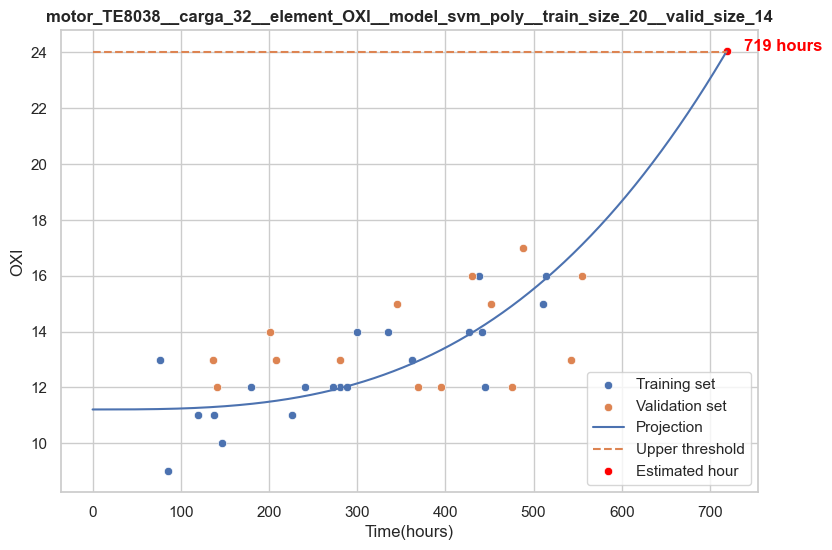

MAE from cross valid:  0.3461804827838426
MAE from valid:  0.3981331852821523
The estimated hour is: 828  hours


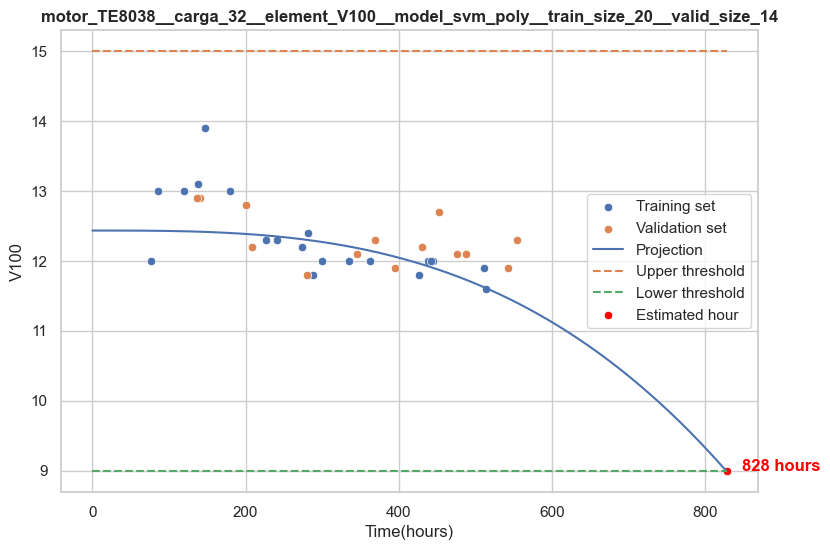

MAE from cross valid:  1.7973437709792697
MAE from valid:  1.7944900886298047
The estimated hour is: 1151  hours


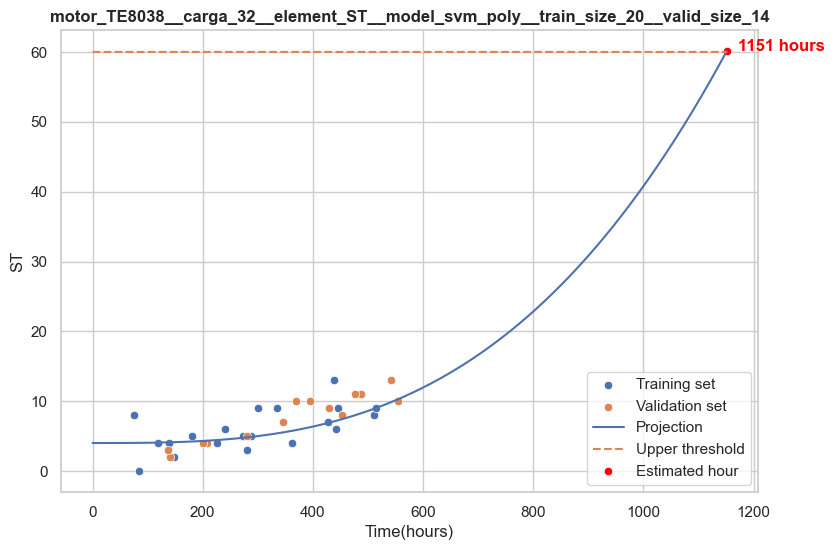

MAE from cross valid:  0.7159292503605319
MAE from valid:  0.9452475605762372


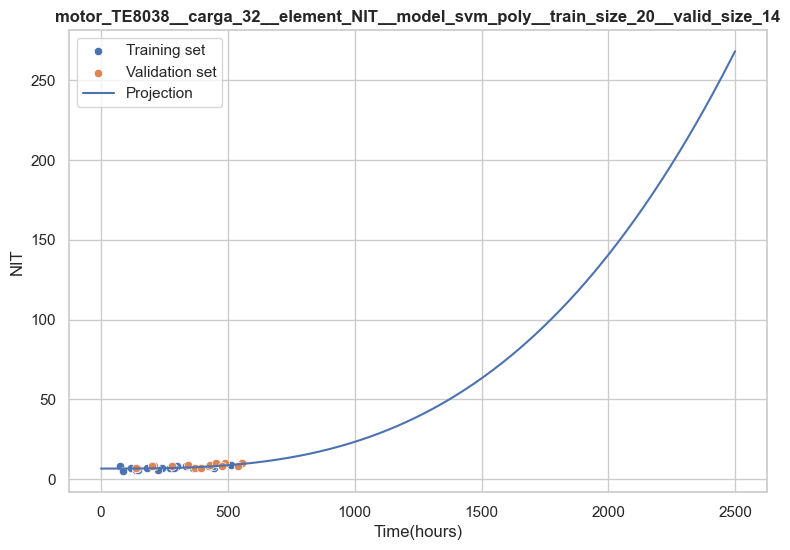

MAE from cross valid:  2.394867057983644
MAE from valid:  4.12687149429907
The estimated hour is: 696  hours


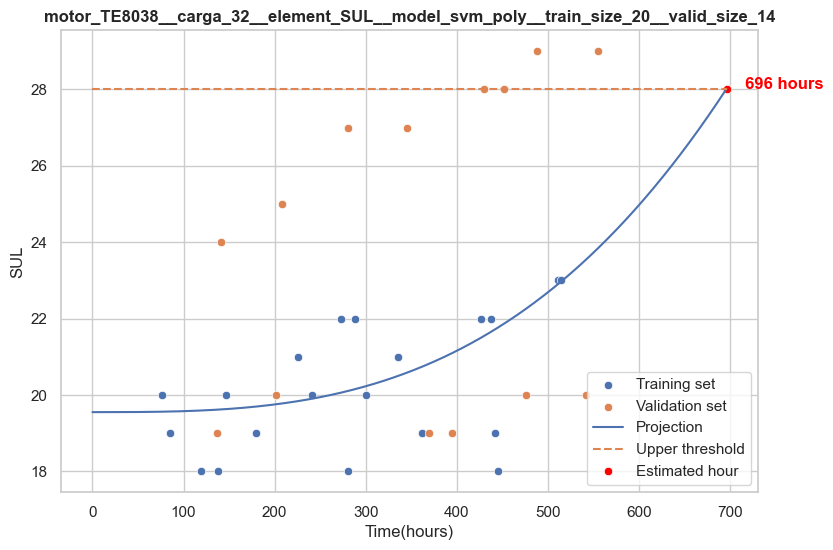

MAE from cross valid:  3.939990191291855
MAE from valid:  2.284349331919906
The estimated hour is: 688  hours


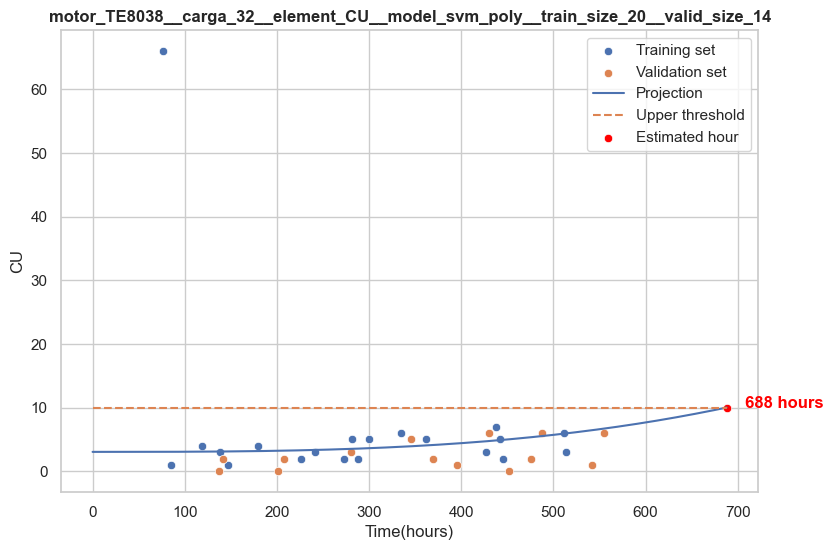

MAE from cross valid:  3.600214060259251
MAE from valid:  5.970240849202686
The estimated hour is: 711  hours


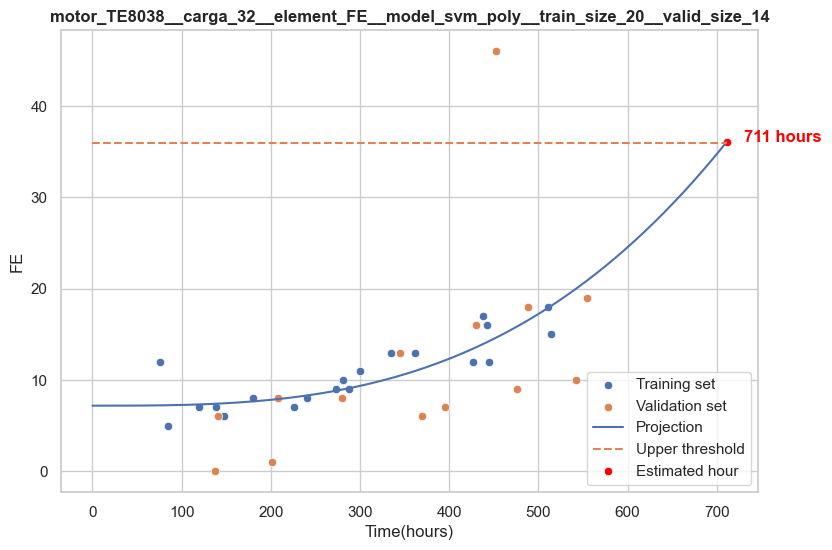

MAE from cross valid:  0.25517766327642755
MAE from valid:  0.24878873287682143
The estimated hour is: 723  hours


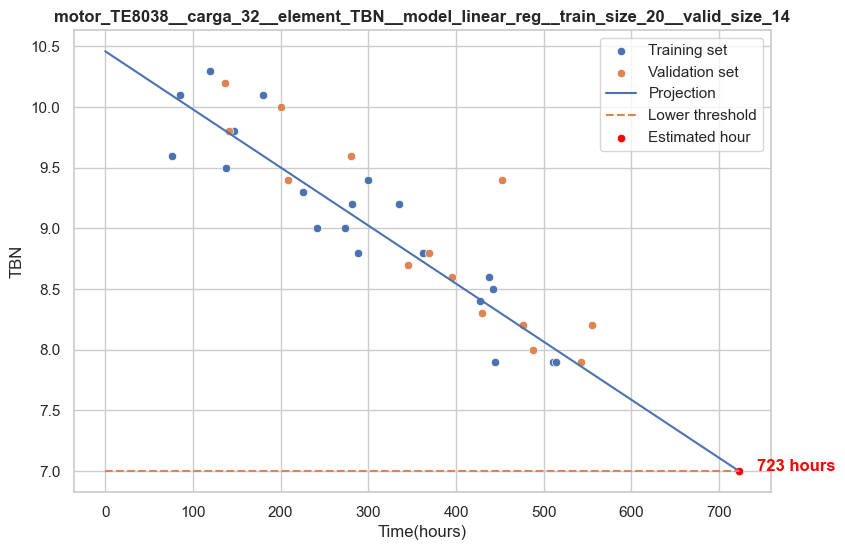

MAE from cross valid:  1.2263639497500487
MAE from valid:  1.5867593579076924
The estimated hour is: 1361  hours


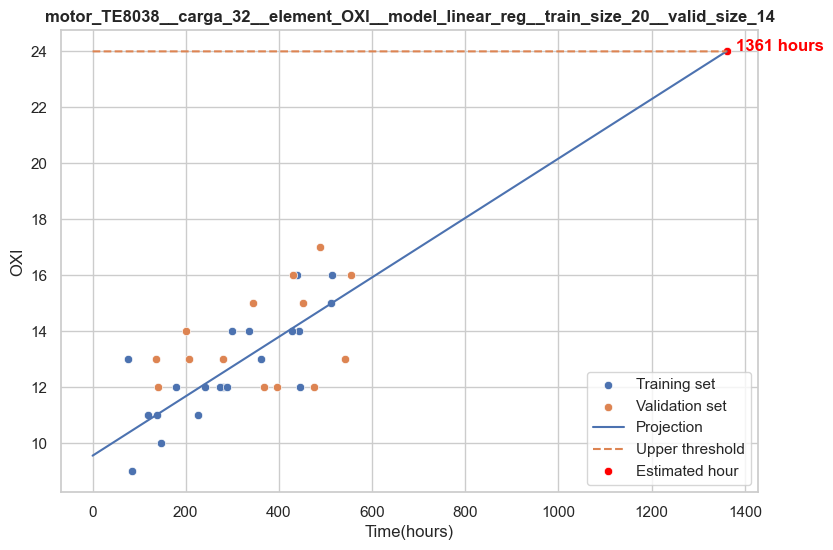

MAE from cross valid:  0.30594084615886075
MAE from valid:  0.33835747400833976
The estimated hour is: 1405  hours


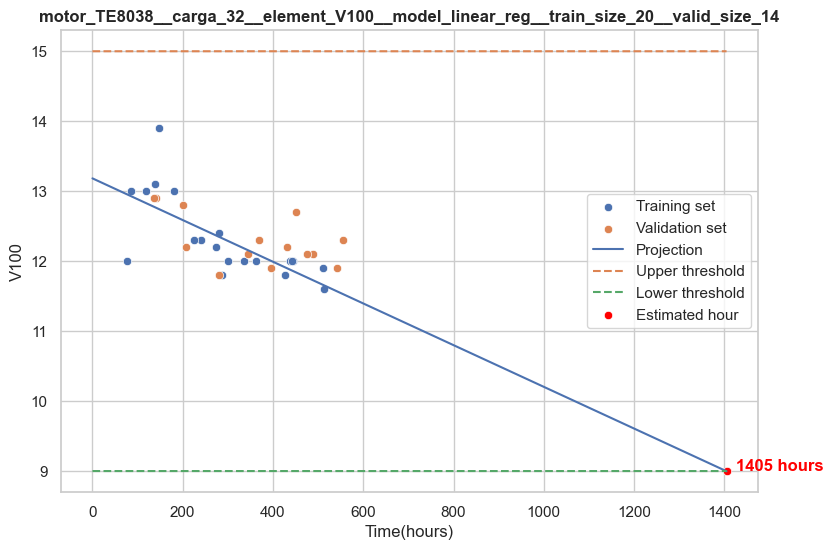

MAE from cross valid:  1.7284484161161286
MAE from valid:  1.5204119808377303


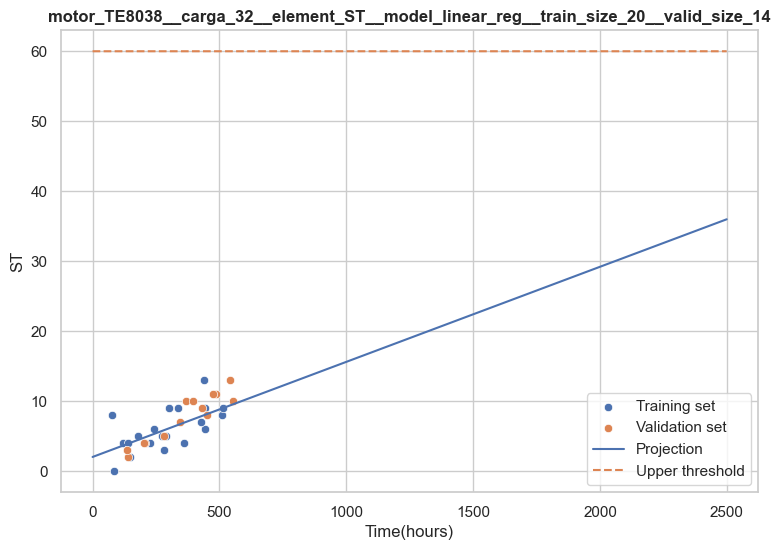

MAE from cross valid:  0.7835553190311657
MAE from valid:  0.9878924134033121


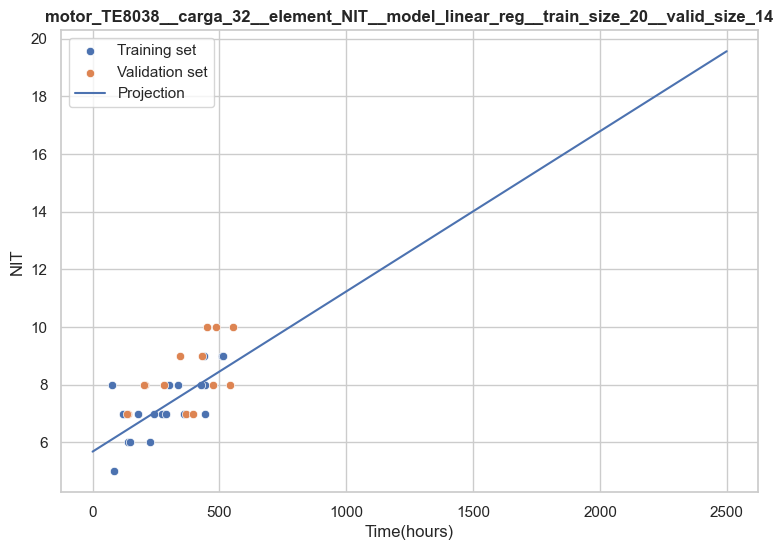

MAE from cross valid:  2.631525031416702
MAE from valid:  4.22183792660662
The estimated hour is: 1566  hours


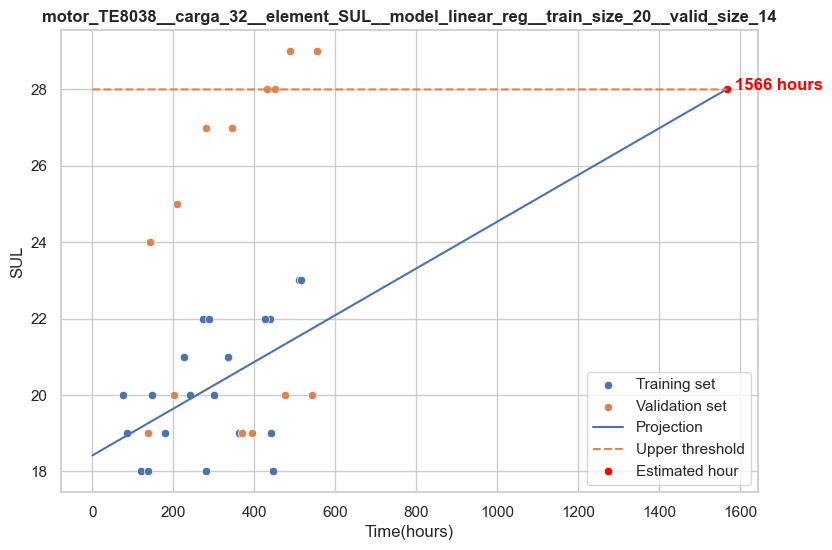

MAE from cross valid:  5.323560852911611
MAE from valid:  4.81737114731847


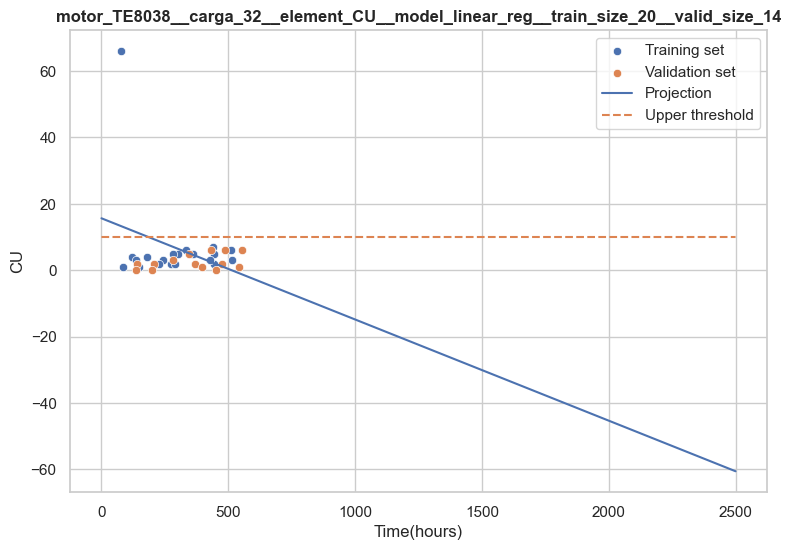

MAE from cross valid:  3.446210842372317
MAE from valid:  6.036857602232897
The estimated hour is: 1412  hours


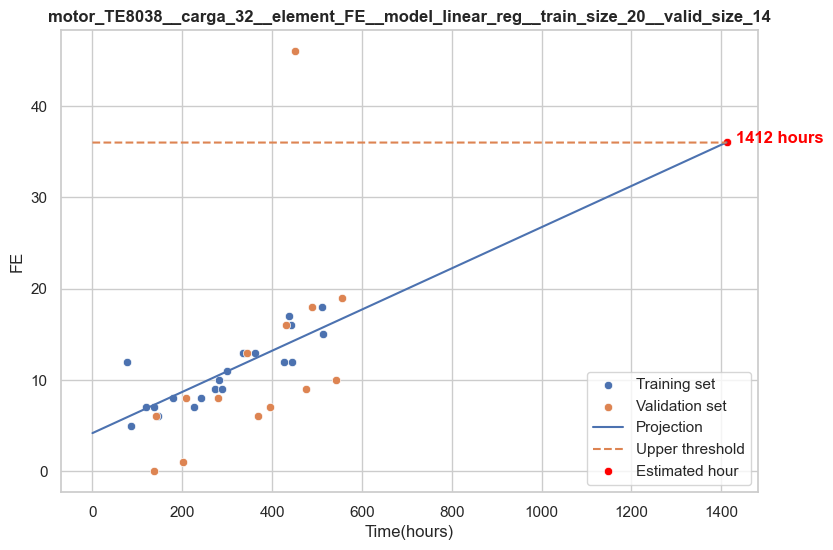


The cross validation MAE for the motor TE8038 with carga 32 and trainned using 20 points and validated using 14 points is:
          svm_linear  svm_poly  linear_reg   Diff
Compound                                         
TBN         0.247801  0.312313    0.255178   True
OXI         1.254213  1.179644    1.226364  False
V100        0.332848  0.346180    0.305941  False
ST          1.831835  1.797344    1.728448  False
NIT         0.865588  0.715929    0.783555  False
SUL         2.431545  2.394867    2.631525   True
CU          3.992666  3.939990    5.323561   True
FE          3.709068  3.600214    3.446211  False

The validation MAE for the motor TE8038 with carga 32 and trainned using 20 points and validated using 14 points is:
          svm_linear  svm_poly  linear_reg   Diff
Compound                                         
TBN         0.257526  0.364538    0.248789  False
OXI         1.678571  1.731106    1.586759  False
V100        0.337803  0.398133    0.338357   True
ST      

In [19]:
# ----------------------------------- #
# ----------- Parameters ------------ #
# ----------------------------------- #
train_size = 20
motor_name = 'TE8038'
carga = 32
horas_oleo_max = 2500
# ----------------------------------- #
# ----------------------------------- #

# automate the approach above to train models for each oil element at once
scores = {}
maes = {}
hours = {}

for i, model_name in enumerate(['svm_linear','svm_poly','linear_reg']):
    
    for j, y_column in enumerate(['TBN', 'OXI', 'V100', 'ST', 'NIT', 'SUL', 'CU', 'FE']):
        
        #  X_column = ['Horas Oleo','Horas Oleo shifted', y_column + ' shifted']
        X_column = ['Horas Oleo']

        score, mae, hour = generate_models_2(motor_name, carga, X_column, y_column, train_size, model_name, horas_oleo_max)

        if not (model_name in scores):
            scores[model_name] = [score]
            maes[model_name] = [mae]
            hours[model_name] = [hour]
        else:
            scores[model_name].append(score)
            maes[model_name].append(mae)
            hours[model_name].append(hour)

maes_df=pd.DataFrame(maes, index=['TBN', 'OXI', 'V100', 'ST', 'NIT', 'SUL', 'CU', 'FE'])
scores_df=pd.DataFrame(scores, index=['TBN', 'OXI', 'V100', 'ST', 'NIT', 'SUL', 'CU', 'FE'])
hours_df=pd.DataFrame(hours, index=['TBN', 'OXI', 'V100', 'ST', 'NIT', 'SUL', 'CU', 'FE'])
maes_df.index.name = 'Compound'
scores_df.index.name = 'Compound'
hours_df.index.name = 'Compound'

print('\nThe cross validation MAE for the motor {} with carga {} and trainned using {} points and validated using {} points is:'.format(motor_name,carga,train_size,len(X_valid['Horas Oleo'])))
scores_df['Diff'] = scores_df.svm_linear<=scores_df.linear_reg
print(scores_df)

print('\nThe validation MAE for the motor {} with carga {} and trainned using {} points and validated using {} points is:'.format(motor_name,carga,train_size,len(X_valid['Horas Oleo'])))
maes_df['Diff'] = maes_df.svm_linear<=maes_df.linear_reg
print(maes_df)

print('\nThe estimated hour for the motor {} with carga {} and trainned using {} points and validated using {} points is:'.format(motor_name,carga,train_size,len(X_valid['Horas Oleo'])))
print(hours_df)


##### Interactive way to use the models and estimate hours

In [20]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(generate_models_2,
         motors_data=motors_data, 
         motor_name=['TE8037','TE8038'], 
         carga=[1,2,3,4,5,6,7,8,9,10,11], 
         X_column=[['Horas Oleo']], 
         y_column=['TBN', 'OXI', 'V100', 'ST', 'NIT', 'SUL', 'CU', 'FE'], 
         train_size=[5,10,15,20,25,30], 
         model_name=['svm_linear', 'linear_reg'],
         horas_oleo_max=[1000,2000,3000,4000]
        )

interactive(children=(Dropdown(description='motor_name', options=('TE8037', 'TE8038'), value='TE8037'), Dropdo…

<function __main__.generate_models_2(motor_name, carga, X_column, y_column, train_size, model_name, horas_oleo_max)>

# This next part is just to plot all the models projection in the same graph, in order to add it to the paper

In [21]:
def generate_models_3(motor_name,carga,X_column,y_column,train_size,model_name,horas_oleo_max,index_model):
    
    # Getting the pair X and y used to feed our ML model
#     X = motors_data.loc[(motors_data.Motor == motor_name) & (motors_data.Carga == carga)][X_column]
#     y = motors_data.loc[(motors_data.Motor == motor_name) & (motors_data.Carga == carga)][y_column]
    X = motors_data.loc[(motors_data.Motor == motor_name)][X_column]
    y = motors_data.loc[(motors_data.Motor == motor_name)][y_column]
    
    # Splitting data into training and validation sets
    X_train, y_train, X_valid, y_valid = X.iloc[:train_size], y.iloc[:train_size], X.iloc[train_size:], y.iloc[train_size:]
    
    # Selects the specified model
    if model_name == 'svm_linear': my_model = SVR(kernel='linear')
    if model_name == 'svm_poly': my_model = SVR(kernel='poly')
    if model_name == 'linear_reg': my_model = LinearRegression()   
    if model_name == 'mlp_tanh': 
        from sklearn.neural_network import MLPRegressor
        from sklearn.pipeline import Pipeline
        from sklearn.preprocessing import StandardScaler, MinMaxScaler
        my_model = Pipeline([('scaler', MinMaxScaler()), ('mlp',MLPRegressor(hidden_layer_sizes=(100,), activation='tanh',max_iter=2000,random_state=1))])
    if model_name == 'mlp_identity': 
        from sklearn.neural_network import MLPRegressor
        from sklearn.pipeline import Pipeline
        from sklearn.preprocessing import StandardScaler, MinMaxScaler
        my_model = Pipeline([('scaler', MinMaxScaler()), ('mlp',MLPRegressor(hidden_layer_sizes=(100,), activation='identity',max_iter=2000,random_state=1))])
    if model_name == 'bayes':
        from sklearn.linear_model import BayesianRidge
        my_model = BayesianRidge()
    if model_name == 'huber':
        from sklearn.linear_model import HuberRegressor
        my_model = HuberRegressor()
    if model_name == 'ridge':
        from sklearn.linear_model import Ridge
        my_model = Ridge()
  
    
    cv = len(X['Horas Oleo'])
    scores = -1 * cross_val_score(my_model,X,y,cv=cv,scoring='neg_mean_absolute_error')
    print("MAE from cross valid: ", scores.mean())
    
    # Train the model
    my_model.fit(X_train,y_train)

    # Use the trainned model to predict the validation data and evaluate the model using the MAE
    if len(X_valid) > 0:
        pred_valid = my_model.predict(X_valid)
        mae = mean_absolute_error(y_valid,pred_valid)
        print("MAE from valid: ", mae)
    else:
        pred_valid = []
        mae = None
        print("MAE from valid: ", mae)


    # generates the model curve fit
    # projects the fitted curve
    # estimates the hour that the predicted curve touches the thresholds
    
    # horas_oleo_max = 1200
    step = 1
    horas_oleo = 0
    y_proj_before = None
    X_proj_before = None
    y_proj = None
    X_proj = None
    element = y_column
    X_projs = []
    y_projs = []
    X_proj_touch = None
    y_proj_touch = None

    while horas_oleo < horas_oleo_max:

        X_proj_before = X_proj
        y_proj_before = y_proj
        
        X_proj = [[horas_oleo]]
        y_proj = my_model.predict(X_proj)
        X_projs.append(X_proj[0][0])
        y_projs.append(y_proj[0])

        if not(isinstance(y_proj_before,type(None))) and not(isinstance(y_proj,type(None))):
            if not(isinstance(thresholds[element]['max'],type(None))):
                 if y_proj_before < thresholds[element]['max'] and y_proj >= thresholds[element]['max']:
                        X_proj_touch = [horas_oleo]
                        y_proj_touch = y_proj
                        break

            if not(isinstance(thresholds[element]['min'],type(None))):
                 if y_proj_before > thresholds[element]['min'] and y_proj <= thresholds[element]['min']:
                        X_proj_touch = [horas_oleo]
                        y_proj_touch = y_proj
                        break

        horas_oleo += step


    # Plot the trainning and validation dataset, and the model's curve fit
    
    # Plot projection graph 
    sns.set_theme(style="whitegrid")
    X_projs = pd.DataFrame({'Horas Oleo':X_projs})    
    
    linestyles = ['solid','dashed','dashdot']
    
    sns.lineplot(x=X_projs['Horas Oleo'], y=y_projs, label='Projection ('+model_name+')',linestyle=linestyles[i])#, color = colors[i])
    
    # plot the failure point
    if not(isinstance(thresholds[element]['max'],type(None))) or not(isinstance(thresholds[element]['min'],type(None))):   # it touched one of the threshold, so lets print the point
        if not(isinstance(X_proj_touch,type(None))) or not(isinstance(y_proj_touch,type(None))):
            sns.scatterplot(x=X_proj_touch, y=y_proj_touch, color='red')#,label='Estimated hour')
            print('The estimated hour is:',X_proj_touch[0],' hours')

    plt.xlabel('Time(hours)')
    plt.ylabel(y_column)
#     plt.savefig('./graphs/'+name+'.png')
#     plt.show()


    if index_model==2:
        sns.scatterplot(x=X_train['Horas Oleo'], y=y_train, legend='full', label='Training set')
        sns.scatterplot(x=X_valid['Horas Oleo'], y=y_valid, legend='full', label='Validation set',marker="x",linewidth=2)

        # plot the upper/lower thresholds
        if not(isinstance(thresholds[element]['max'],type(None))):
            sns.lineplot(x=X_projs['Horas Oleo'], y=[thresholds[element]['max'] for i in range(0,len(X_projs['Horas Oleo']))], linestyle=':', label='Upper threshold',linewidth=2) #linestyle='dashed',
        if not(isinstance(thresholds[element]['min'],type(None))):
            sns.lineplot(x=X_projs['Horas Oleo'], y=[thresholds[element]['min'] for i in range(0,len(X_projs['Horas Oleo']))], linestyle=':', label='Lower threshold',linewidth=2)


    return scores.mean(), mae, (X_proj_touch[0] if not(isinstance(X_proj_touch,type(None))) else None)

MAE from cross valid:  0.24780130747501736
MAE from valid:  0.2575258075066345
The estimated hour is: 729  hours
MAE from cross valid:  0.31231298516794054
MAE from valid:  0.364537922042184
The estimated hour is: 578  hours
MAE from cross valid:  0.25517766327642755
MAE from valid:  0.24878873287682143
The estimated hour is: 723  hours


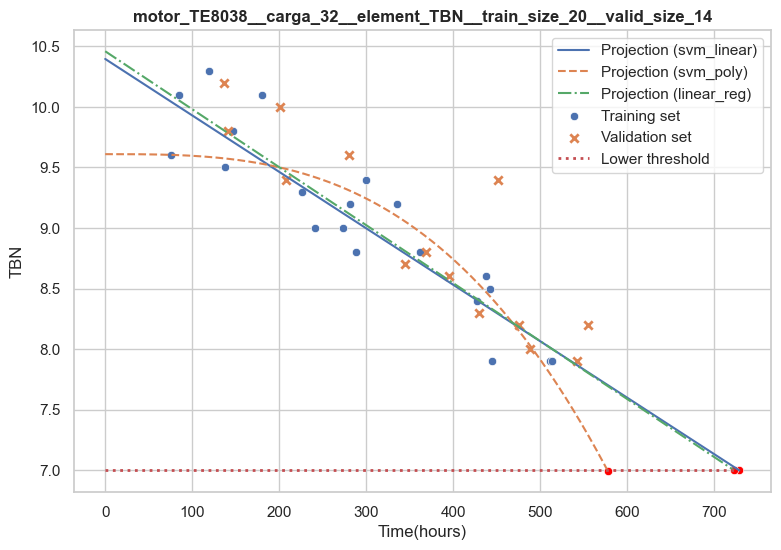

MAE from cross valid:  1.254212608096805
MAE from valid:  1.6785714285797693
The estimated hour is: 1331  hours
MAE from cross valid:  1.1796439425675709
MAE from valid:  1.7311064593990781
The estimated hour is: 719  hours
MAE from cross valid:  1.2263639497500487
MAE from valid:  1.5867593579076924
The estimated hour is: 1361  hours


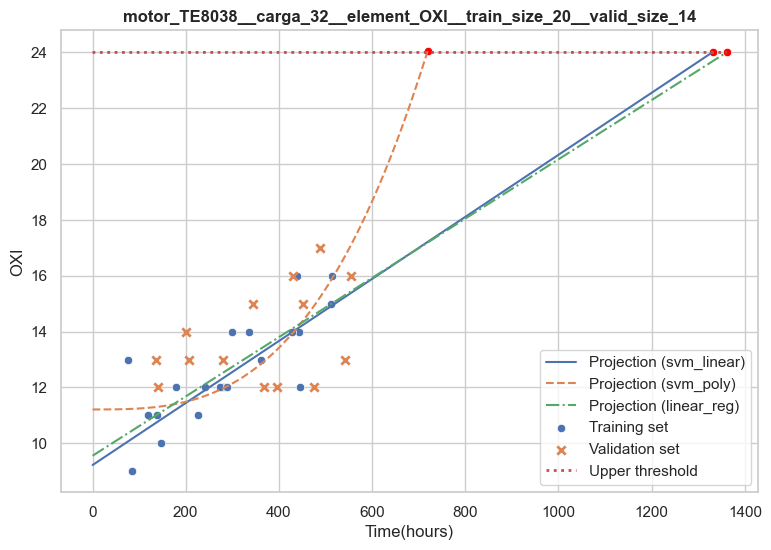

MAE from cross valid:  0.33284814331840895
MAE from valid:  0.3378029912165159
The estimated hour is: 1436  hours
MAE from cross valid:  0.3461804827838426
MAE from valid:  0.3981331852821523
The estimated hour is: 828  hours
MAE from cross valid:  0.30594084615886075
MAE from valid:  0.33835747400833976
The estimated hour is: 1405  hours


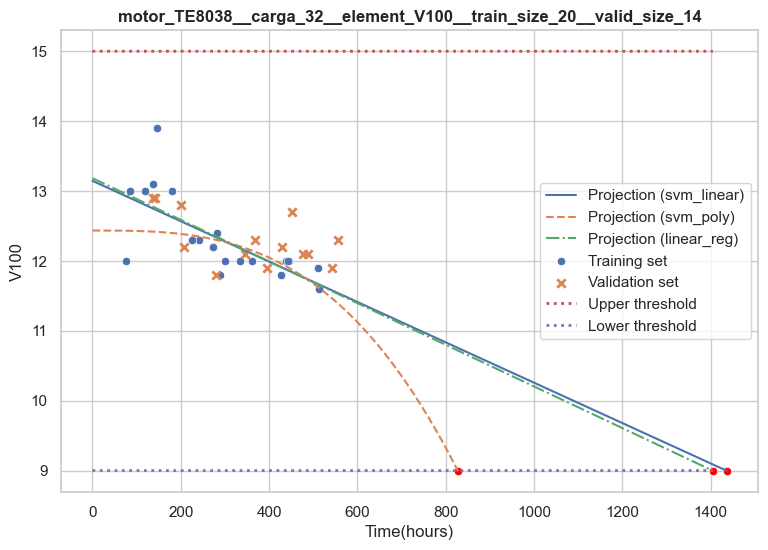

MAE from cross valid:  1.831834566388153
MAE from valid:  1.9198774415969686
MAE from cross valid:  1.7973437709792697
MAE from valid:  1.7944900886298047
The estimated hour is: 1151  hours
MAE from cross valid:  1.7284484161161286
MAE from valid:  1.5204119808377303


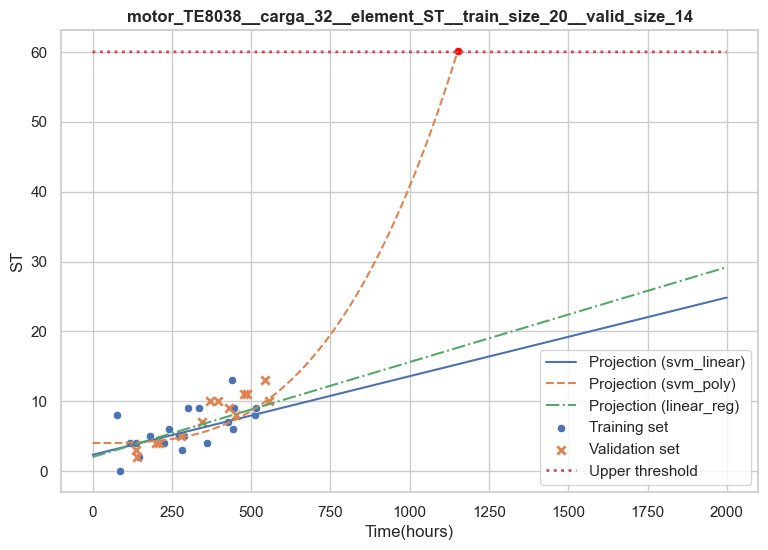

MAE from cross valid:  0.8655883058024361
MAE from valid:  1.0734527053304908
MAE from cross valid:  0.7159292503605319
MAE from valid:  0.9452475605762372
MAE from cross valid:  0.7835553190311657
MAE from valid:  0.9878924134033121


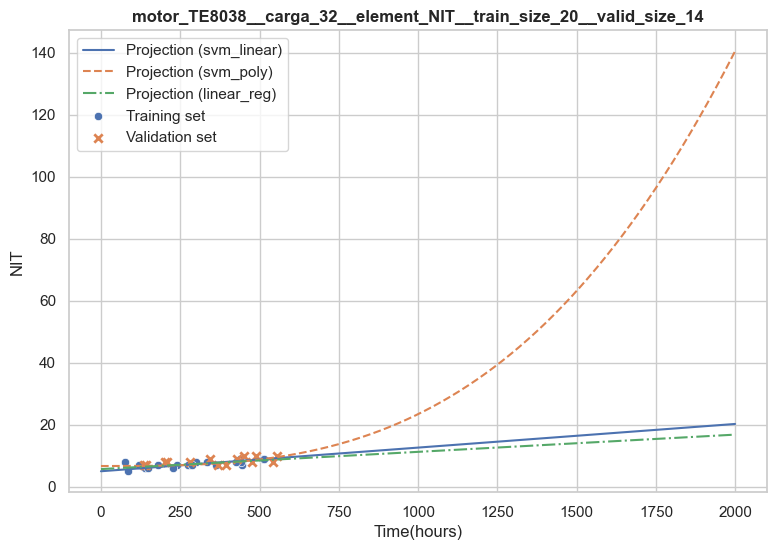

MAE from cross valid:  2.4315446237630427
MAE from valid:  4.107142857160844
The estimated hour is: 1058  hours
MAE from cross valid:  2.394867057983644
MAE from valid:  4.12687149429907
The estimated hour is: 696  hours
MAE from cross valid:  2.631525031416702
MAE from valid:  4.22183792660662
The estimated hour is: 1566  hours


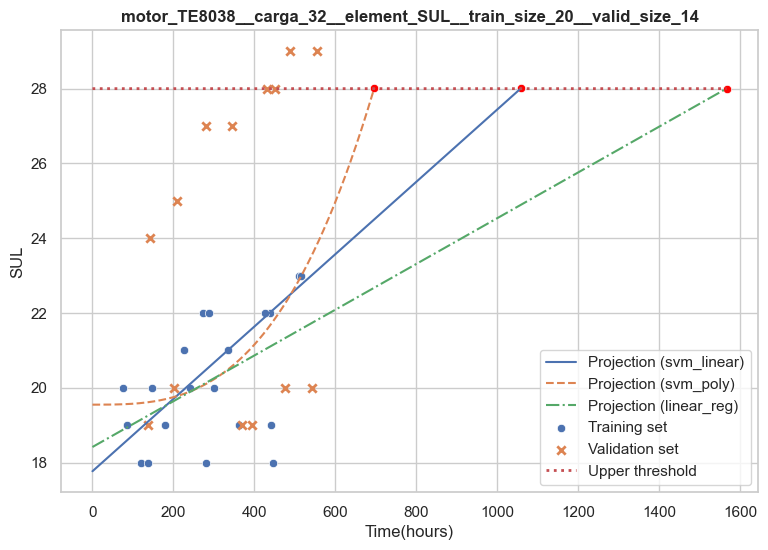

MAE from cross valid:  3.9926660352357337
MAE from valid:  2.277584586470327
The estimated hour is: 1304  hours
MAE from cross valid:  3.939990191291855
MAE from valid:  2.284349331919906
The estimated hour is: 688  hours
MAE from cross valid:  5.323560852911611
MAE from valid:  4.81737114731847


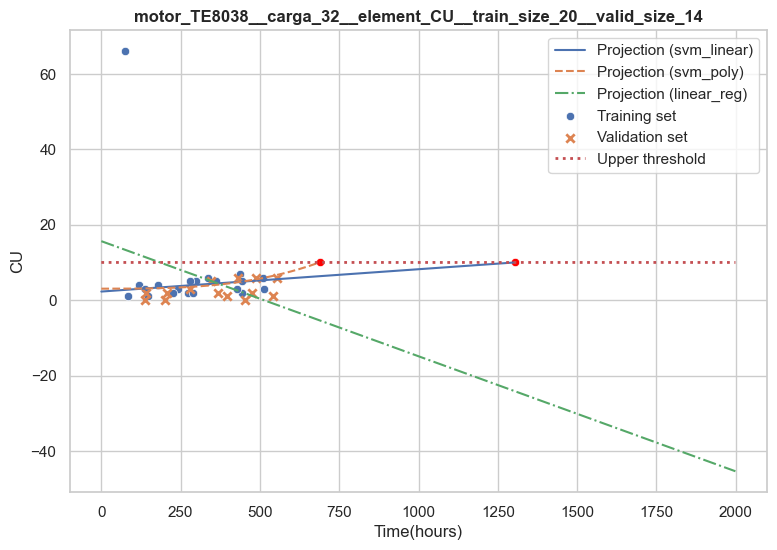

MAE from cross valid:  3.7090684584230904
MAE from valid:  5.926173826198798
The estimated hour is: 1439  hours
MAE from cross valid:  3.600214060259251
MAE from valid:  5.970240849202686
The estimated hour is: 711  hours
MAE from cross valid:  3.446210842372317
MAE from valid:  6.036857602232897
The estimated hour is: 1412  hours


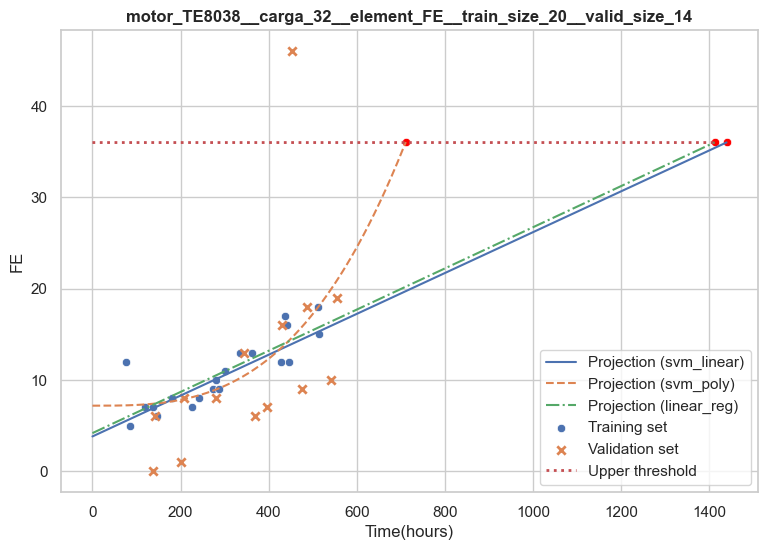


The cross validation MAE for the motor TE8038 with carga 32 and trainned using 20 points and validated using 14 points is:
          svm_linear  svm_poly  linear_reg
Compound                                  
TBN         0.247801  0.312313    0.255178
OXI         1.254213  1.179644    1.226364
V100        0.332848  0.346180    0.305941
ST          1.831835  1.797344    1.728448
NIT         0.865588  0.715929    0.783555
SUL         2.431545  2.394867    2.631525
CU          3.992666  3.939990    5.323561
FE          3.709068  3.600214    3.446211

The validation MAE for the motor TE8038 with carga 32 and trainned using 20 points and validated using 14 points is:
          svm_linear  svm_poly  linear_reg
Compound                                  
TBN         0.257526  0.364538    0.248789
OXI         1.678571  1.731106    1.586759
V100        0.337803  0.398133    0.338357
ST          1.919877  1.794490    1.520412
NIT         1.073453  0.945248    0.987892
SUL         4.107143  4.126

In [22]:
# ----------------------------------- #
# ----------- Parameters ------------ #
# ----------------------------------- #
train_size = 20
motor_name = 'TE8038'
carga = 32
horas_oleo_max = 2000
# ----------------------------------- #
# ----------------------------------- #

# automate the approach above to train models for each oil element at once
scores = {}
maes = {}
scores_r2 = {}
r2s = {}
hours = {}

for j, y_column in enumerate(['TBN', 'OXI', 'V100', 'ST', 'NIT', 'SUL', 'CU', 'FE']):
    
    figure = plt.figure(figsize=(9,6))
    
    for i, model_name in enumerate(['svm_linear','svm_poly','linear_reg']):
        
        X_column = ['Horas Oleo']

        score, mae, hour = generate_models_3(motor_name, carga, X_column, y_column, train_size, model_name, horas_oleo_max,i)

        if not (model_name in scores):
            scores[model_name] = [score]
            maes[model_name] = [mae]
            hours[model_name] = [hour]
        else:
            scores[model_name].append(score)
            maes[model_name].append(mae)
            hours[model_name].append(hour)

    name = 'motor_{}__carga_{}__element_{}__train_size_{}__valid_size_{}'.format(motor_name,carga,y_column,train_size,len(X_valid['Horas Oleo']))
    plt.title(name, fontweight='bold')
    # plt.savefig('./graphs/'+name+'.png')
    plt.show()
    
maes_df=pd.DataFrame(maes, index=['TBN', 'OXI', 'V100', 'ST', 'NIT', 'SUL', 'CU', 'FE'])
scores_df=pd.DataFrame(scores, index=['TBN', 'OXI', 'V100', 'ST', 'NIT', 'SUL', 'CU', 'FE'])
hours_df=pd.DataFrame(hours, index=['TBN', 'OXI', 'V100', 'ST', 'NIT', 'SUL', 'CU', 'FE'])
maes_df.index.name = 'Compound'
scores_df.index.name = 'Compound'
hours_df.index.name = 'Compound'

print('\nThe cross validation MAE for the motor {} with carga {} and trainned using {} points and validated using {} points is:'.format(motor_name,carga,train_size,len(X_valid['Horas Oleo'])))
print(scores_df)

print('\nThe validation MAE for the motor {} with carga {} and trainned using {} points and validated using {} points is:'.format(motor_name,carga,train_size,len(X_valid['Horas Oleo'])))
print(maes_df)

print('\nThe estimated hour for the motor {} with carga {} and trainned using {} points and validated using {} points is:'.format(motor_name,carga,train_size,len(X_valid['Horas Oleo'])))
print(hours_df)
